# **Projek Machine Learning (Clustering)**

Nama : Fadhlurrahman Akbar Nasution

NIM  : 1301194258

Kelas : IF-43-09

## **Impoart Libarry Yang Digunakan**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

## **Memasukan dataset yang akan digunakan**

In [33]:
# df_train = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/Documents/Kuliah/SEMESTER_5/Machine_Learning/Tubes_ML_Clustering/Data/kendaraan_train.csv')
df_train = pd.read_csv('Data/kendaraan_train.csv')
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


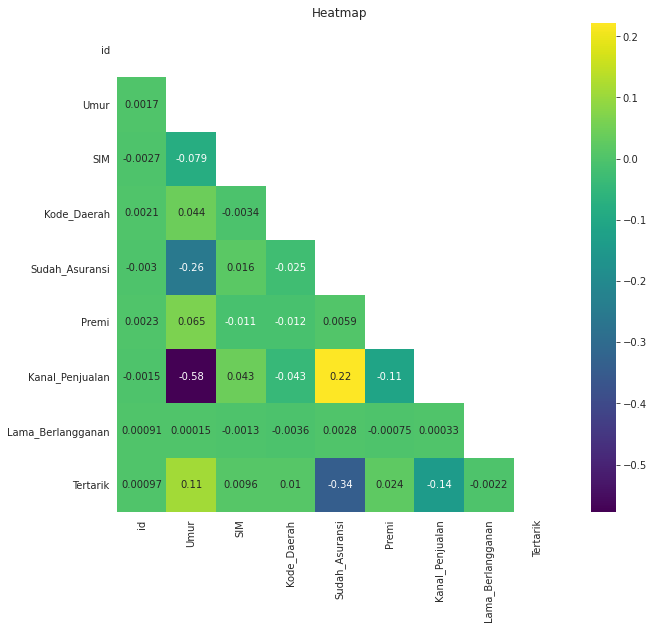

In [34]:
#heatmap mencari korelasi antar kolom
mask = np.triu(np.ones_like(df_train.corr(),dtype=bool))
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,9))
    ax = sns.heatmap(df_train.corr(), mask=mask, annot=True,cmap='viridis')
    ax.set_title('Heatmap')

In [35]:
df_train.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

## **Data PrePocessing**

### **Mengubah Data String To integer**

In [36]:
#mengubah data dari string enjadi integer agar mudah diproses
df_train['Jenis_Kelamin']= df_train['Jenis_Kelamin'].str.replace('Pria','1')
df_train['Jenis_Kelamin']= df_train['Jenis_Kelamin'].str.replace('Wanita','0')
df_train['Kendaraan_Rusak']= df_train['Kendaraan_Rusak'].str.replace('Pernah','1')
df_train['Kendaraan_Rusak']= df_train['Kendaraan_Rusak'].str.replace('Tidak','0')
df_train['Umur_Kendaraan']= df_train['Umur_Kendaraan'].str.replace('< 1 Tahun','0')
df_train['Umur_Kendaraan']= df_train['Umur_Kendaraan'].str.replace('1-2 Tahun','1')
df_train['Umur_Kendaraan']= df_train['Umur_Kendaraan'].str.replace('> 2 Tahun','2')

#drop kolom yang tidak digunakan
del df_train['id']
del df_train['Tertarik']
#ubah Nilai menjadi numeric
df_train['Jenis_Kelamin']= pd.to_numeric(df_train['Jenis_Kelamin'])
df_train['Kendaraan_Rusak']= pd.to_numeric(df_train['Kendaraan_Rusak'])
df_train['Umur_Kendaraan']= pd.to_numeric(df_train['Umur_Kendaraan'])

### **Analisis Distribusi Data Untuk Menentukan Handling Mising Value Menggunakan Mean/Modus/Median** 

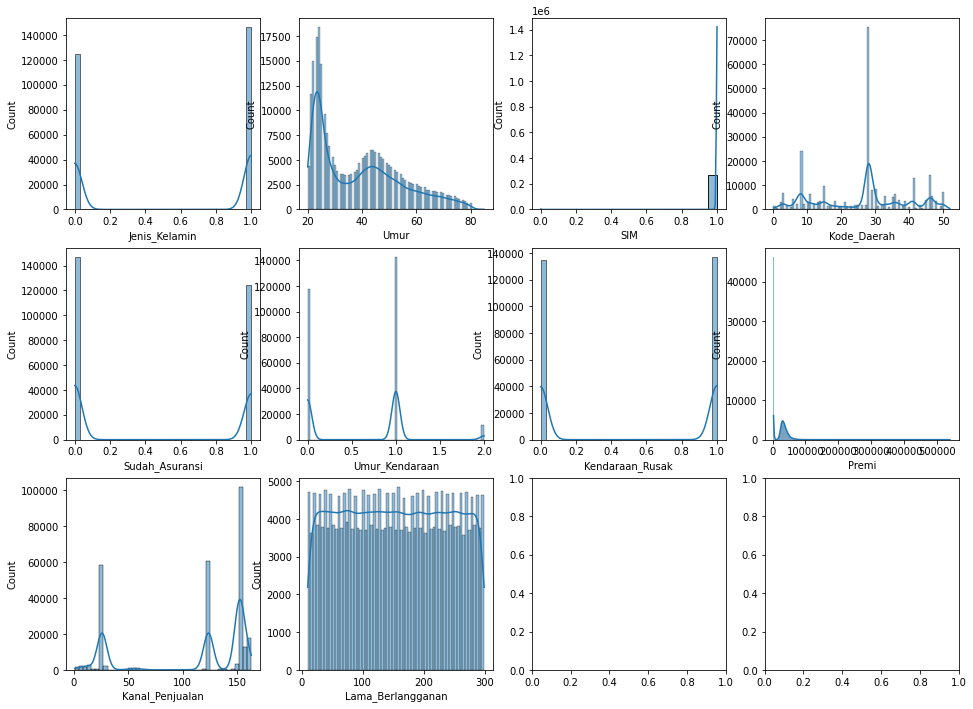

In [15]:
fig, ax = plt.subplots(nrows= 3, ncols=4, figsize=(16,12))
sns.histplot(x="Jenis_Kelamin", data=df_train, kde=True, ax=ax[0,0])
sns.histplot(x="Umur", data=df_train, kde=True, ax=ax[0,1])
sns.histplot(x="SIM", data=df_train, kde=True, ax=ax[0,2])
sns.histplot(x="Kode_Daerah", data=df_train, kde=True, ax=ax[0,3])
sns.histplot(x="Sudah_Asuransi", data=df_train, kde=True, ax=ax[1,0])
sns.histplot(x="Umur_Kendaraan", data=df_train, kde=True, ax=ax[1,1])
sns.histplot(x="Kendaraan_Rusak", data=df_train, kde=True, ax=ax[1,2])
sns.histplot(x="Premi", data=df_train, kde=True, ax=ax[1,3])
sns.histplot(x="Kanal_Penjualan", data=df_train, kde=True, ax=ax[2,0])
sns.histplot(x="Lama_Berlangganan", data=df_train, kde=True, ax=ax[2,1])
plt.show()

In [16]:
df_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [17]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0


In [18]:
#Menggunakna Mean Ketika data memiliki distribusi normal 
df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].mean(), inplace=True)

#Menggunakna Mode(modus) jika data kategorikal dan perbedaan hasilnya sangat jauh
col_mode = ['SIM','Kode_Daerah','Kanal_Penjualan']
for x in col_mode:
    df_train[x].fillna(df_train[x].mode()[0], inplace=True)
#Menggunakan Median jika distribusi data memiliki kemiringan(skewness)
col_median = ['Umur','Jenis_Kelamin','Umur_Kendaraan','Premi','Sudah_Asuransi','Kendaraan_Rusak']
for i in col_median:
    df_train[i].fillna(df_train[i].median(), inplace=True)

In [19]:

df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [20]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0


In [21]:
#pengecekan data yang duplikat
df_train[df_train.duplicated()]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
24277,1.0,21.0,1.0,14.0,1.0,0.0,0.0,2630.0,160.0,202.000000
26597,1.0,50.0,1.0,28.0,0.0,1.0,1.0,31646.0,26.0,154.286302
26774,1.0,41.0,1.0,28.0,0.0,1.0,1.0,2630.0,124.0,76.000000
30907,1.0,25.0,1.0,28.0,0.0,0.0,1.0,2630.0,152.0,127.000000
34700,1.0,43.0,1.0,28.0,0.0,1.0,1.0,31646.0,124.0,285.000000
...,...,...,...,...,...,...,...,...,...,...
283840,1.0,40.0,1.0,28.0,0.0,1.0,1.0,2630.0,26.0,233.000000
284038,0.0,46.0,1.0,28.0,0.0,1.0,1.0,31646.0,24.0,154.286302
285037,1.0,23.0,1.0,8.0,1.0,0.0,0.0,2630.0,152.0,71.000000
285254,0.0,43.0,1.0,28.0,0.0,1.0,1.0,2630.0,124.0,252.000000


In [22]:
#Melakukan drop dengan data yang duplikat
df_train=df_train.drop_duplicates()
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0


### **HANDLING OUTLIER***

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

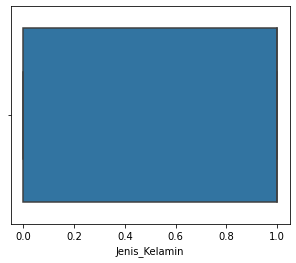

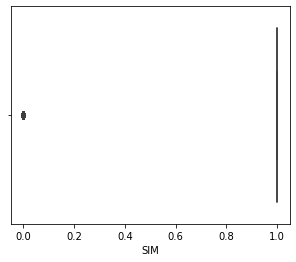

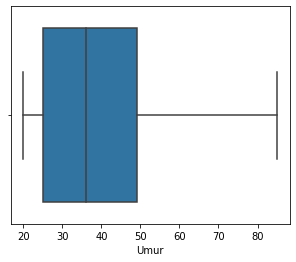

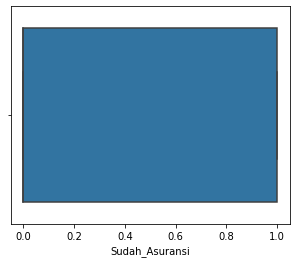

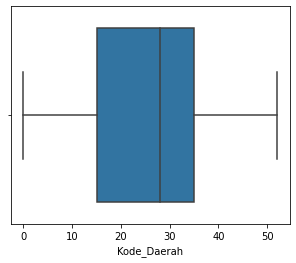

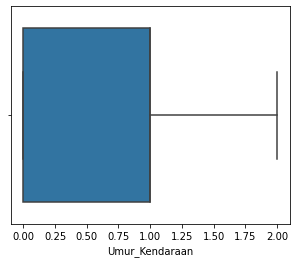

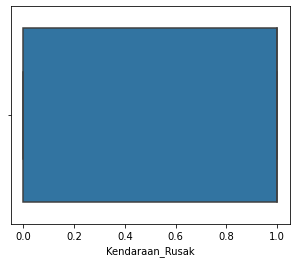

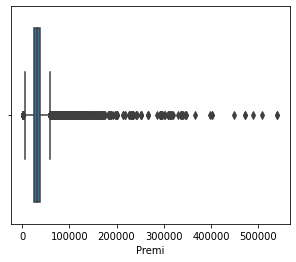

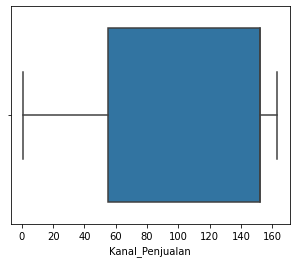

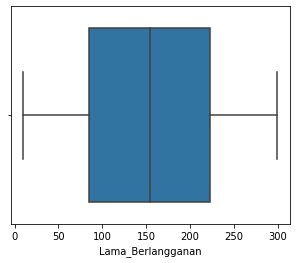

In [23]:
fitur = ['Jenis_Kelamin','SIM','Umur','Sudah_Asuransi','Kode_Daerah','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Lama_Berlangganan']
for i in fitur:
    fig = plt.figure(figsize=(5,4))
    sns.boxplot(df_train[i])

In [24]:
#Membuat pembersihaan outlier 
def outlier_detection(data_column):
    sorted(data_column)
    Q1 ,Q3 = np.percentile(data_column,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
# Pembersihan data outlier premi
outlier = []

lowerbound, upperbound = outlier_detection(df_train['Premi'])
df_train = df_train[~((df_train['Premi']<lowerbound) | (df_train['Premi']>upperbound))]

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premi'>

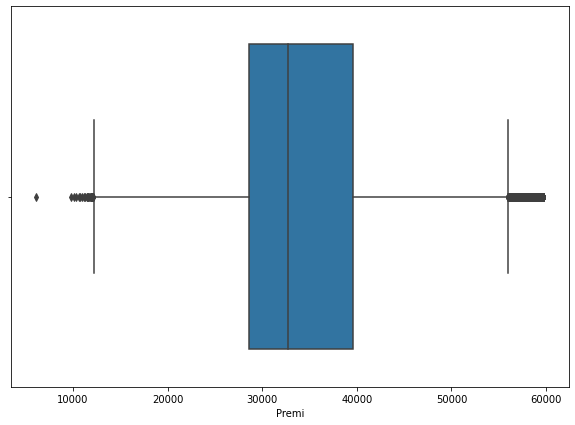

In [26]:
#Hasil Data Yang Telah Di bersihkan Outliernya 
fig = plt.figure(figsize=(10,7))
sns.boxplot(df_train['Premi'])

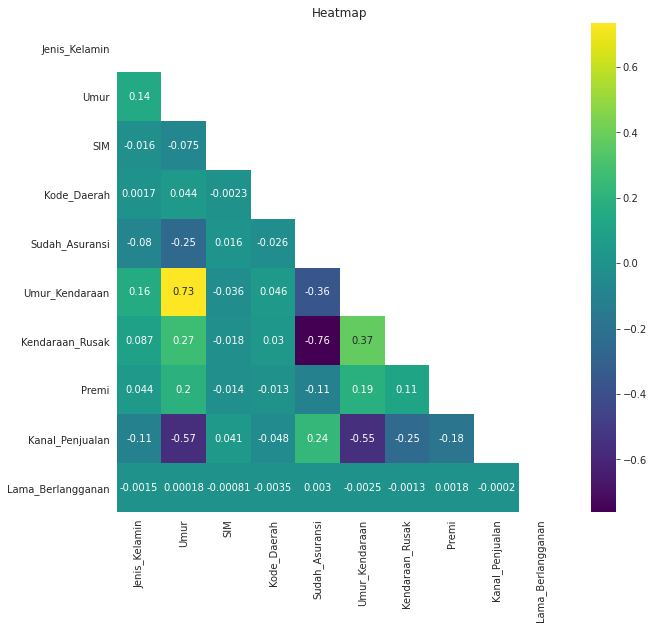

In [27]:
#heatmap mencari korelasi antar kolom
mask = np.triu(np.ones_like(df_train.corr(),dtype=bool))
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,9))
    ax = sns.heatmap(df_train.corr(), mask=mask, annot=True,cmap='viridis')
    ax.set_title('Heatmap')
plt.show()

### **Normalisasi Data**

In [28]:
# Melakukan Normalisasi Data Menggunakan z-score method
df_trainNormalisasi = (df_train - df_train.mean())/(df_train.std())
df_trainNormalisasi

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-1.122799,-0.534762,0.044711,0.506524,1.092527,-1.069754,-1.024379,-0.763296,0.710121,-0.701261
1,0.890628,0.656147,0.044711,0.978349,-0.915305,2.491438,0.976197,-1.025075,-1.606579,0.045787
2,0.890628,-1.130216,0.044711,1.528812,1.092527,-1.069754,-1.024379,-0.210846,0.860800,-0.431833
4,0.890628,0.788470,0.044711,0.663799,-0.915305,2.491438,0.976197,0.038602,-0.495316,0.486668
5,0.890628,-1.130216,0.044711,0.663799,1.092527,-1.069754,-1.024379,-1.385036,0.710121,0.204994
...,...,...,...,...,...,...,...,...,...,...
285826,-1.122799,-0.997893,0.044711,-1.773964,1.092527,-1.069754,-1.024379,-1.002996,0.710121,0.768342
285827,-1.122799,-1.130216,0.044711,1.528812,1.092527,-1.069754,-1.024379,1.192945,0.710121,-1.276855
285828,-1.122799,-0.997893,0.044711,1.843362,1.092527,-1.069754,-1.024379,1.787791,0.710121,0.878562
285829,0.890628,1.979378,0.044711,-1.538051,1.092527,0.710842,-1.024379,-0.472743,0.182742,1.417417


In [29]:
df_trainNormalisasi.to_csv('Data/kendaraan_train_clean.csv', index=False)

In [30]:
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(df_trainNormalisasi)
#memasukan data implementasi PCA ke dataset baru
df_pca = pd.DataFrame(data = principalComponent)
df_pca.columns = ['Component_1','Component_2']
df_pca

,Component_1,Component_2
0,-2.184836,0.329283
1,2.917861,0.161468
2,-2.089879,0.416098
3,2.702796,0.017162
4,-2.287977,0.263063
...,...,...
230562,-2.547640,0.081705
230563,-2.045069,0.446805
230564,-1.860918,0.611804
230565,0.318384,2.022060


In [31]:
df_pca.to_csv('Data/kendaraan_train_pca_clean.csv', index=False)